In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import math
import time
import seaborn as sns
import warnings
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data.csv', on_bad_lines='skip')
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,allFeatures,lemmatised,snow_stemmed,noun,stem_lemm,lemm_stem,lemm_noun,noun_lemm
0,15970,men,apparel,topwear,shirts,navy blue,fall,2011.0,casual,turtle check men navy blue shirt,15970.jpg,shirtmen turtle topwear men fall shirts check ...,shirtmen turtle topwear men fall shirt check b...,shirtmen turtl topwear men fall shirt check bl...,shirtmen men shirts apparel,shirtmen turtle topwear men fall shirt check b...,shirtmen turtl topwear men fall shirt check bl...,shirtmen men shirts apparel,shirtmen turtle topwear men fall shirt check b...
1,39386,men,apparel,bottomwear,jeans,blue,summer,2012.0,casual,peter england men party blue jeans,39386.jpg,peter party men summer jeansmen blue bottomwea...,peter party men summer jeansmen blue bottomwea...,peter parti men summer jeansmen blue bottomwea...,peter party men summer jeansmen england appare...,peter party men summer jeansmen blue bottomwea...,peter parti men summer jeansmen blue bottomwea...,peter party men summer jeansmen england appare...,peter party men summer jeansmen blue bottomwea...
2,59263,women,accessories,watches,watches,silver,winter,2016.0,casual,titan women silver watch,59263.jpg,silver watchwomen titan accessories winter wat...,silver watchwomen titan accessory winter watch...,silver watchwomen titan accessori winter watch...,silver watchwomen accessories watches women,silver watchwomen titan accessory winter watch...,silver watchwomen titan accessori winter watch...,silver watchwomen accessories watches women,silver watchwomen titan accessory winter watch...
3,21379,men,apparel,bottomwear,track pants,black,fall,2011.0,casual,manchester united men solid black track pants,21379.jpg,solid black pantsmen track men fall united bot...,solid black pantsmen track men fall united bot...,solid black pantsmen track men fall unit botto...,pantsmen men manchester pants,solid black pantsmen track men fall united bot...,solid black pantsmen track men fall unit botto...,pantsmen men manchester pants,solid black pantsmen track men fall united bot...
4,53759,men,apparel,topwear,tshirts,grey,summer,2012.0,casual,puma men grey tshirt,53759.jpg,topwear men tshirts summer puma grey apparel t...,topwear men tshirts summer puma grey apparel t...,topwear men tshirt summer puma grey apparel ts...,men tshirts summer puma grey apparel tshirtmen,topwear men tshirts summer puma grey apparel t...,topwear men tshirt summer puma grey apparel ts...,men tshirts summer puma grey apparel tshirtmen,topwear men tshirts summer puma grey apparel t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41686,42234,women,apparel,topwear,tops,blue,summer,2012.0,casual,sepia women blue printed top,42234.jpg,topwomen topwear printed sepia summer tops blu...,topwomen topwear printed sepia summer top blue...,topwomen topwear print sepia summer top blue a...,topwomen summer tops women,topwomen topwear printed sepia summer top blue...,topwomen topwear print sepia summer top blue a...,topwomen summer tops women,topwomen topwear printed sepia summer top blue...
41687,17036,men,footwear,shoes,casual shoes,white,summer,2013.0,casual,gas men caddy casual shoe,17036.jpg,caddy casual men summer shoemen white shoes ga...,caddy casual men summer shoemen white shoe gas...,caddi casual men summer shoemen white shoe gas...,men summer shoemen shoes gas,caddy casual men summer shoemen white shoe gas...,caddi casual men summer shoemen white shoe gas...,men summer shoemen shoes gas,caddy casual men summer shoemen white shoe gas...
41688,6461,men,footwear,flip flops,flip flops,red,summer,2011.0,casual,lotto mens soccer track flip flop,6461.jpg,flip lotto flopmen track summer mens soccer re...,flip lotto flopmen track summer men soccer red...,flip lotto flopmen track summer men soccer red...,flip lotto flopmen summer mens soccer flops,flip lotto flopmen track summer men soccer red...,flip lotto flopmen 

In [3]:
half_size = len(df) // 5
df_copy = df.iloc[:half_size]
df_copy

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,allFeatures,lemmatised,snow_stemmed,noun,stem_lemm,lemm_stem,lemm_noun,noun_lemm
0,15970,men,apparel,topwear,shirts,navy blue,fall,2011.0,casual,turtle check men navy blue shirt,15970.jpg,shirtmen turtle topwear men fall shirts check ...,shirtmen turtle topwear men fall shirt check b...,shirtmen turtl topwear men fall shirt check bl...,shirtmen men shirts apparel,shirtmen turtle topwear men fall shirt check b...,shirtmen turtl topwear men fall shirt check bl...,shirtmen men shirts apparel,shirtmen turtle topwear men fall shirt check b...
1,39386,men,apparel,bottomwear,jeans,blue,summer,2012.0,casual,peter england men party blue jeans,39386.jpg,peter party men summer jeansmen blue bottomwea...,peter party men summer jeansmen blue bottomwea...,peter parti men summer jeansmen blue bottomwea...,peter party men summer jeansmen england appare...,peter party men summer jeansmen blue bottomwea...,peter parti men summer jeansmen blue bottomwea...,peter party men summer jeansmen england appare...,peter party men summer jeansmen blue bottomwea...
2,59263,women,accessories,watches,watches,silver,winter,2016.0,casual,titan women silver watch,59263.jpg,silver watchwomen titan accessories winter wat...,silver watchwomen titan accessory winter watch...,silver watchwomen titan accessori winter watch...,silver watchwomen accessories watches women,silver watchwomen titan accessory winter watch...,silver watchwomen titan accessori winter watch...,silver watchwomen accessories watches women,silver watchwomen titan accessory winter watch...
3,21379,men,apparel,bottomwear,track pants,black,fall,2011.0,casual,manchester united men solid black track pants,21379.jpg,solid black pantsmen track men fall united bot...,solid black pantsmen track men fall united bot...,solid black pantsmen track men fall unit botto...,pantsmen men manchester pants,solid black pantsmen track men fall united bot...,solid black pantsmen track men fall unit botto...,pantsmen men manchester pants,solid black pantsmen track men fall united bot...
4,53759,men,apparel,topwear,tshirts,grey,summer,2012.0,casual,puma men grey tshirt,53759.jpg,topwear men tshirts summer puma grey apparel t...,topwear men tshirts summer puma grey apparel t...,topwear men tshirt summer puma grey apparel ts...,men tshirts summer puma grey apparel tshirtmen,topwear men tshirts summer puma grey apparel t...,topwear men tshirt summer puma grey apparel ts...,men tshirts summer puma grey apparel tshirtmen,topwear men tshirts summer puma grey apparel t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8333,4405,men,apparel,topwear,tshirts,black,summer,2011.0,casual,nirvana mens shoulder fade black tshirt,4405.jpg,black topwear nirvana tshirts summer fade mens...,black topwear nirvana tshirts summer fade men ...,black topwear nirvana tshirt summer fade men s...,nirvana tshirts summer fade mens apparel tshir...,black topwear nirvana tshirts summer fade men ...,black topwear nirvana tshirt summer fade men s...,nirvana tshirts summer fade mens apparel tshir...,black topwear nirvana tshirts summer fade men ...
8334,15052,men,footwear,shoes,formal shoes,black,summer,2013.0,formal,franco leone men black formal shoe,15052.jpg,black franco men summer shoemen leone shoes fo...,black franco men summer shoemen leone shoe for...,black franco men summer shoemen leon shoe form...,franco men summer shoemen leone shoes footwear,black franco men summer shoemen leone shoe for...,black franco men summer shoemen leon shoe form...,franco men summer shoemen leone shoes footwear,black franco men summer shoemen leone shoe for...
8335,52795,men,accessories,wallets,wallets,brown,summer,2012.0,casual,jag men chocolate brown leather wallet,52795.jpg,brown jag leather wallets men accessories summ...,brown jag leather wallet men accessory summer ...,brown jag leather wallet men accessori summer ...,jag wall

In [4]:
def ndcg_at_k_score(y_true, y_pred, k):
    relevance = np.where(y_true == y_pred, 1, 0)
    sorted_relevance = relevance.argsort()[::-1][:k]
    dcg = np.sum(relevance[sorted_relevance] / np.log2(np.arange(2, k+2)))
    idcg = np.sum([1 / np.log2(i+2) for i in range(min(k, len(relevance)))])
    ndcg = dcg / idcg
    return ndcg

In [5]:
from collections import Counter
def diversity(predicted_labels):
    counts = Counter(predicted_labels)
    num_labels = len(predicted_labels)
    diversity_score = 1 - sum([(count/num_labels)**2 for count in counts.values()])
    return diversity_score

In [6]:
def novelty(test_labels, predicted_labels):
    unique_test_labels = set(test_labels)
    unique_predicted_labels = set(predicted_labels)
    novel_labels = unique_predicted_labels - unique_test_labels
    novelty_score = len(novel_labels) / len(unique_predicted_labels)
    return novelty_score

## allFeatures

In [7]:
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, balanced_accuracy_score
from sklearn.metrics.pairwise import cosine_similarity
seed = 800

train_data = df_copy.sample(frac=0.8,random_state=seed) #random state is a seed value
test_data  = df_copy.drop(train_data.index)

def tf_idf(name):
    vectorizer = TfidfVectorizer(min_df = 0)
    vectorizer.fit(train_data[name])
    train_matrix = vectorizer.transform(train_data[name])
    test_matrix = vectorizer.transform(test_data[name])
    cosine_sim = cosine_similarity(test_matrix, train_matrix)
    avg_cosine_sim = cosine_sim.mean()
    test_labels = test_data['articleType'].tolist()
    predicted_labels = []
    for i in range(len(test_data)):
        cosine_scores = cosine_sim[i]
        top_match_idx = cosine_scores.argsort()[-1]
        predicted_label = train_data.iloc[top_match_idx]['articleType']
        predicted_labels.append(predicted_label)
    accuracy = accuracy_score(test_labels, predicted_labels)
    precision = precision_score(test_labels, predicted_labels, average='weighted')
    recall = recall_score(test_labels, predicted_labels, average='weighted')
    f1 = f1_score(test_labels, predicted_labels, average='weighted')
    return predicted_labels, avg_cosine_sim, accuracy, precision, recall, f1

start_time_af = time.time()
predicted_labels, avg_cosine_sim_af, accuracy_af, precision_af, recall_af, f1_af = tf_idf('allFeatures')
end_time_af = time.time()
print('avg_cosine_sim_af:', avg_cosine_sim_af)
print('accuracy_af:', accuracy_af)
print('precision_af:', precision_af)
print('recall_af:', recall_af)
print('f1_af:', f1_af)
time_af = end_time_af - start_time_af
print('Time elapsed:', time_af, 'seconds')


ndcg_af = ndcg_at_k_score(test_data['articleType'], predicted_labels, k=500)
nov_af = novelty(test_data['articleType'], predicted_labels)
div_af = diversity(predicted_labels)
print(ndcg_af, div_af,nov_af)

avg_cosine_sim_af: 0.049838313909660155
accuracy_af: 0.9592326139088729
precision_af: 0.9606719090981554
recall_af: 0.9592326139088729
f1_af: 0.9588183006516026
Time elapsed: 1.0793755054473877 seconds
1.0 0.9455521913404528 0.014285714285714285


## lemmatised

In [5]:
start_time_lem = time.time()
avg_cosine_sim_lem, accuracy_lem, precision_lem, recall_lem, f1_lem = tf_idf('lemmatised')
end_time_lem = time.time()
print('avg_cosine_sim_lem:', avg_cosine_sim_lem)
print('accuracy_lem:', accuracy_lem)
print('precision_lem:', precision_lem)
print('recall_lem:', recall_lem)
print('f1_lem:', f1_lem)
time_lem =  end_time_lem - start_time_lem
print('Time elapsed:', time_lem, 'seconds')

avg_cosine_sim_lem: 0.05105687253940437
accuracy_lem: 0.9586330935251799
precision_lem: 0.9605521876647819
recall_lem: 0.9586330935251799
f1_lem: 0.9584753371491437
Time elapsed: 1.0141065120697021 seconds


## stemmed

In [6]:
start_time_stem = time.time()
avg_cosine_sim_stem, accuracy_stem, precision_stem, recall_stem, f1_stem = tf_idf('snow_stemmed')
end_time_stem = time.time()
print('avg_cosine_sim_stem:', avg_cosine_sim_stem)
print('accuracy_stem:', accuracy_stem)
print('precision_stem:', precision_stem)
print('recall_stem:', recall_stem)
print('f1_stem:', f1_stem)
time_stem = end_time_stem - start_time_stem
print('Time elapsed:', time_stem, 'seconds')

avg_cosine_sim_stem: 0.051197376557933355
accuracy_stem: 0.9580335731414868
precision_stem: 0.9599463641275697
recall_stem: 0.9580335731414868
f1_stem: 0.9578801690535934
Time elapsed: 1.0197172164916992 seconds


## noun

In [7]:
start_time_noun = time.time()
avg_cosine_sim_noun, accuracy_noun, precision_noun, recall_noun, f1_noun = tf_idf('noun')
end_time_noun = time.time()
print('avg_cosine_sim_noun:', avg_cosine_sim_noun)
print('accuracy_noun:', accuracy_noun)
print('precision_noun:', precision_noun)
print('recall_noun:', recall_noun)
print('f1_noun:', f1_noun)
time_noun = end_time_noun - start_time_noun
print('Time elapsed:', time_noun, 'seconds')

avg_cosine_sim_noun: 0.04821092519534075
accuracy_noun: 0.9550359712230215
precision_noun: 0.9566662567245637
recall_noun: 0.9550359712230215
f1_noun: 0.9550702074451818
Time elapsed: 0.8748667240142822 seconds


## stem_lemm

In [8]:
start_time_stem_lemm = time.time()
avg_cosine_sim_stem_lemm, accuracy_stem_lemm, precision_stem_lemm, recall_stem_lemm, f1_stem_lemm = tf_idf('stem_lemm')
end_time_stem_lemm = time.time()
print('avg_cosine_sim_stem_lemm:', avg_cosine_sim_stem_lemm)
print('accuracy_stem_lemm:', accuracy_stem_lemm)
print('precision_stem_lemm:', precision_stem_lemm)
print('recall_stem_lemm:', recall_stem_lemm)
print('f1_stem_lemm:', f1_stem_lemm)
time_stem_lemm = end_time_stem_lemm - start_time_stem_lemm
print('Time elapsed:', time_stem_lemm, 'seconds')

avg_cosine_sim_stem_lemm: 0.05105687253940437
accuracy_stem_lemm: 0.9586330935251799
precision_stem_lemm: 0.9605521876647819
recall_stem_lemm: 0.9586330935251799
f1_stem_lemm: 0.9584753371491437
Time elapsed: 1.0131421089172363 seconds


## lemm_stem

In [9]:
start_time_lemm_stem = time.time()
avg_cosine_sim_lemm_stem, accuracy_lemm_stem, precision_lemm_stem, recall_lemm_stem, f1_lemm_stem = tf_idf('lemm_stem')
end_time_lemm_stem = time.time()
print('avg_cosine_sim_lemm_stem:', avg_cosine_sim_lemm_stem)
print('accuracy_lemm_stem:', accuracy_lemm_stem)
print('precision_lemm_stem:', precision_lemm_stem)
print('recall_lemm_stem:', recall_lemm_stem)
print('f1_lemm_stem:', f1_lemm_stem)
time_lemm_stem = end_time_lemm_stem - start_time_lemm_stem
print('Time elapsed:', time_lemm_stem, 'seconds')

avg_cosine_sim_lemm_stem: 0.051197376557933355
accuracy_lemm_stem: 0.9580335731414868
precision_lemm_stem: 0.9599463641275697
recall_lemm_stem: 0.9580335731414868
f1_lemm_stem: 0.9578801690535934
Time elapsed: 1.0256876945495605 seconds


## lemm_noun

In [10]:
start_time_lemm_noun = time.time()
avg_cosine_sim_lemm_noun, accuracy_lemm_noun, precision_lemm_noun, recall_lemm_noun, f1_lemm_noun = tf_idf('lemm_noun')
end_time_lemm_noun = time.time()
print('avg_cosine_sim_lemm_noun:', avg_cosine_sim_lemm_noun)
print('accuracy_lemm_noun:', accuracy_lemm_noun)
print('precision_lemm_noun:', precision_lemm_noun)
print('recall_lemm_noun:', recall_lemm_noun)
print('f1_lemm_noun:', f1_lemm_noun)
time_lemm_noun = end_time_lemm_noun - start_time_lemm_noun
print('Time elapsed:', time_lemm_noun, 'seconds')

avg_cosine_sim_lemm_noun: 0.04821092519534075
accuracy_lemm_noun: 0.9550359712230215
precision_lemm_noun: 0.9566662567245637
recall_lemm_noun: 0.9550359712230215
f1_lemm_noun: 0.9550702074451818
Time elapsed: 0.8781743049621582 seconds


## noun_lemm

In [11]:
start_time_noun_lemm = time.time()
avg_cosine_sim_noun_lemm, accuracy_noun_lemm, precision_noun_lemm, recall_noun_lemm, f1_noun_lemm = tf_idf('noun_lemm')
end_time_noun_lemm = time.time()
print('avg_cosine_sim_noun_lemm:', avg_cosine_sim_noun_lemm)
print('accuracy_noun_lemm:', accuracy_noun_lemm)
print('precision_noun_lemm:', precision_noun_lemm)
print('recall_noun_lemm:', recall_noun_lemm)
print('f1_noun_lemm:', f1_noun_lemm)
time_noun_lemm = end_time_noun_lemm - start_time_noun_lemm
print('Time elapsed:', time_noun_lemm, 'seconds')

avg_cosine_sim_noun_lemm: 0.05105687253940437
accuracy_noun_lemm: 0.9586330935251799
precision_noun_lemm: 0.9605521876647819
recall_noun_lemm: 0.9586330935251799
f1_noun_lemm: 0.9584753371491437
Time elapsed: 1.0145392417907715 seconds


## Графики

### Accurasy

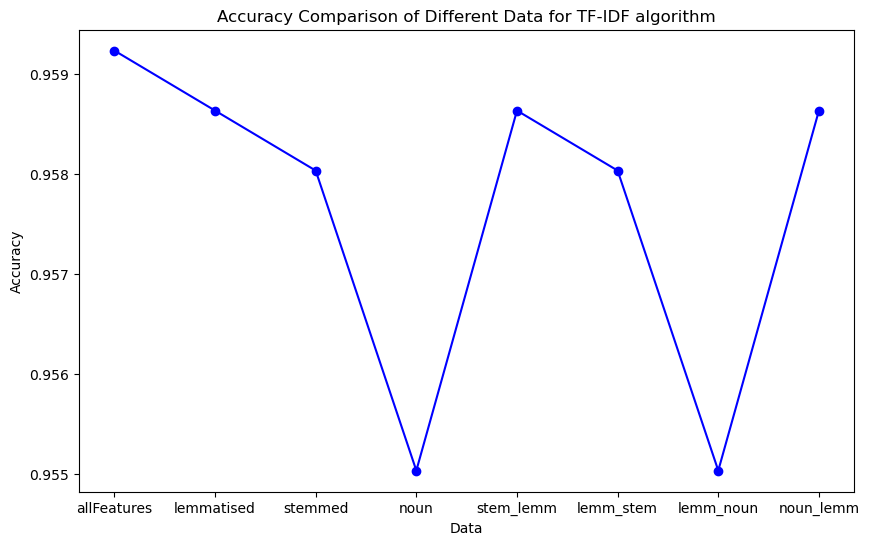

In [12]:
data = ['allFeatures', 'lemmatised', 'stemmed', 'noun', 'stem_lemm', 'lemm_stem', 'lemm_noun', 'noun_lemm']
accuracy = [accuracy_af, accuracy_lem, accuracy_stem, accuracy_noun, accuracy_stem_lemm, accuracy_lemm_stem, accuracy_lemm_noun, accuracy_noun_lemm]

fig = plt.figure(figsize=(10, 6))

plt.plot(data, accuracy, marker='o', color='blue', label='Accuracy')

plt.xlabel('Data')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Data for TF-IDF algorithm')

plt.show()

[0.9588183006516026, 0.9584753371491437, 0.9578801690535934, 0.9550702074451818, 0.9584753371491437, 0.9578801690535934, 0.9550702074451818, 0.9584753371491437]


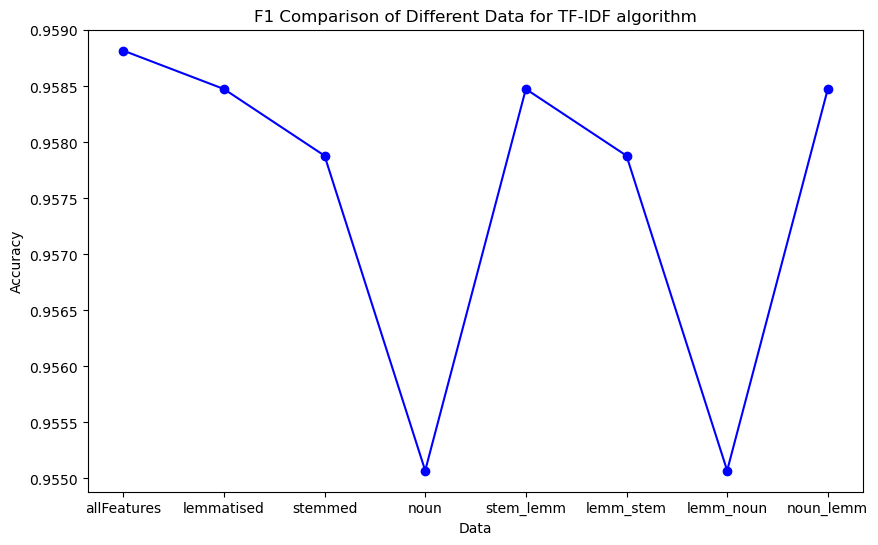

In [15]:
data = ['allFeatures', 'lemmatised', 'stemmed', 'noun', 'stem_lemm', 'lemm_stem', 'lemm_noun', 'noun_lemm']
accuracy = [f1_af, f1_lem, f1_stem, f1_noun, f1_stem_lemm, f1_lemm_stem, f1_lemm_noun, f1_noun_lemm]
print(accuracy)
fig = plt.figure(figsize=(10, 6))
plt.plot(data, accuracy, marker='o', color='blue', label='Accuracy')

plt.xlabel('Data')
plt.ylabel('Accuracy')
plt.title('F1 Comparison of Different Data for TF-IDF algorithm')

plt.show()

[1.0510447025299072, 1.0141065120697021, 1.0197172164916992, 0.8748667240142822, 1.0131421089172363, 1.0256876945495605, 0.8781743049621582, 1.0145392417907715]


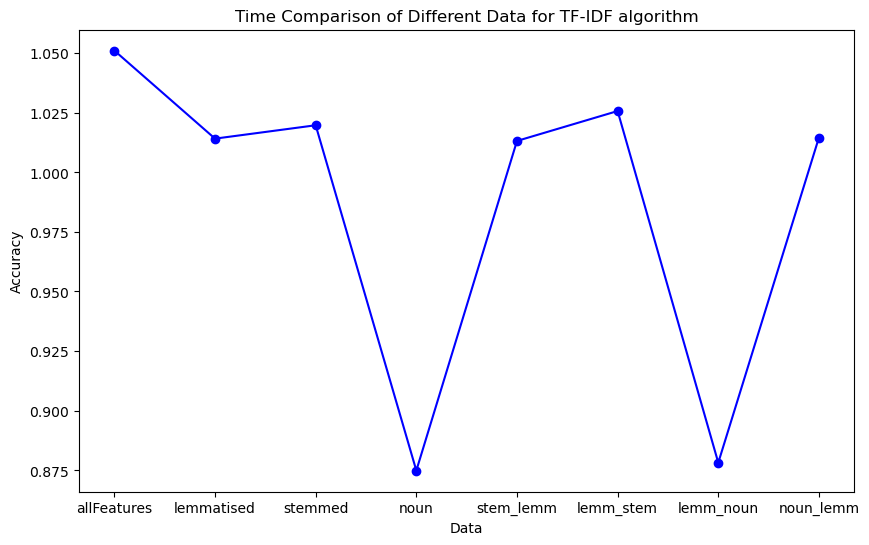

In [16]:
data = ['allFeatures', 'lemmatised', 'stemmed', 'noun', 'stem_lemm', 'lemm_stem', 'lemm_noun', 'noun_lemm']
accuracy = [time_af, time_lem, time_stem, time_noun, time_stem_lemm, time_lemm_stem, time_lemm_noun, time_noun_lemm]
print(accuracy)
fig = plt.figure(figsize=(10, 6))
plt.plot(data, accuracy, marker='o', color='blue', label='Accuracy')

plt.xlabel('Data')
plt.ylabel('Accuracy')
plt.title('Time Comparison of Different Data for TF-IDF algorithm')

plt.show()